In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import & Cleanning data

In [103]:
def concat_df():
    for i in range(3):
        df23 = pd.read_csv(f'best sellin books 202{i + 3}.csv', encoding='ISO-8859-1')
        # print(f"file rows : {len(df23)}")
        
        if i == 0 :
            df = df23
        else :
            df = pd.concat([df, df23], axis = 0, ignore_index=True)
    return df

dff = concat_df()
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               299 non-null    object 
 1   Book name        299 non-null    object 
 2   Author           299 non-null    object 
 3   Rating           299 non-null    object 
 4   reviews count    299 non-null    int64  
 5   form             299 non-null    object 
 6   price            299 non-null    object 
 7   Reading age      108 non-null    object 
 8   Print Length     295 non-null    float64
 9   Publishing date  299 non-null    object 
 10  Genre            299 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 25.8+ KB


In [104]:
dff.head()

,id,Book name,Author,Rating,reviews count,form,price,Reading age,Print Length,Publishing date,Genre
0,#1,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8 out of 5 stars,145747,Hardcover,$18.88,NaN,320.0,16/10/2018,Self-Improvement
1,#2,"Iron Flame (Standard Edition) (The Empyrean, 2)",Rebecca Yarros,4.7 out of 5 stars,395512,Hardcover,$11.05,NaN,640.0,07/11/2023,Fiction & Action & Adventure
2,#3,Spare,Prince Harry The Duke of Sussex,4.5 out of 5 stars,116101,Hardcover,$11.99,NaN,416.0,"January 10, 2023",Biographies & Memoirs
3,#4,Fourth Wing,Rebecca Yarros,4.8 out of 5 stars,472618,Paperback,$13.62,NaN,544.0,17/09/2024,Fiction & Action & Adventure
4,#5,The Woman in Me,Britney Spears,4.4 out of 5 stars,51520,Hardcover,$11.37,NaN,288.0,"October 24, 2023",Biographies & Memoirs


In [105]:
### ลบ String ที่ไม่ต้องการออกไป , Remove the un-wanted string
dff['Rating'] = pd.to_numeric(dff['Rating'].str.replace(' out of 5 stars', '', regex=False))
dff['price'] = pd.to_numeric(dff['price'].str.replace('$', '', regex=False))

### เปลี่ยน column จาก string ให้เป็น datetime , Change string to datetime
dff['Publishing date'] = pd.to_datetime(dff['Publishing date'], format = 'mixed')

dff.head()

,id,Book name,Author,Rating,reviews count,form,price,Reading age,Print Length,Publishing date,Genre
0,#1,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,4.8,145747,Hardcover,18.88,NaN,320.0,2018-10-16,Self-Improvement
1,#2,"Iron Flame (Standard Edition) (The Empyrean, 2)",Rebecca Yarros,4.7,395512,Hardcover,11.05,NaN,640.0,2023-07-11,Fiction & Action & Adventure
2,#3,Spare,Prince Harry The Duke of Sussex,4.5,116101,Hardcover,11.99,NaN,416.0,2023-01-10,Biographies & Memoirs
3,#4,Fourth Wing,Rebecca Yarros,4.8,472618,Paperback,13.62,NaN,544.0,2024-09-17,Fiction & Action & Adventure
4,#5,The Woman in Me,Britney Spears,4.4,51520,Hardcover,11.37,NaN,288.0,2023-10-24,Biographies & Memoirs


In [106]:
dff['Genre'].value_counts(dropna = False)

Genre
Fiction & Action & Adventure                75
Reading & Writing                           57
Arts & Music & Photography                  28
Mystery & Thriller & Suspense               22
Health & Fitness & Dieting                  19
Self-Improvement                            18
Politics & Social Sciences                  15
Biographies & Memoirs                       11
Bible Study & Reference                      9
Business & Money                             8
Cookbooks & Food                             7
Comics & Graphic Novels                      6
Parenting & Relationships                    5
Schools & Teaching                           4
Puzzles & Games                              4
History                                      3
Engineering                                  3
Humor & Entertainment                        2
Computers & Technology                       1
Romance                                      1
Friendship & Social Skills & School Life     1
Name: c

In [107]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               299 non-null    object        
 1   Book name        299 non-null    object        
 2   Author           299 non-null    object        
 3   Rating           299 non-null    float64       
 4   reviews count    299 non-null    int64         
 5   form             299 non-null    object        
 6   price            299 non-null    float64       
 7   Reading age      108 non-null    object        
 8   Print Length     295 non-null    float64       
 9   Publishing date  299 non-null    datetime64[ns]
 10  Genre            299 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 25.8+ KB


## Regression model
END of cleaning

Steps :
1. ทำนายราคา (price) จาก Rating, reviews count, Print Length

### Prepare data

In [108]:
df_for_model = dff.drop(labels=['id', 'Book name', 'Author', 'form', 'Reading age', 'Publishing date', 'Genre'], axis=1)

X = df_for_model.drop("price", axis=1).values
y = df_for_model["price"].values

print(df_for_model.columns)
print(type(X), type(y))
print(X.shape, y.shape)

Index(['Rating', 'reviews count', 'price', 'Print Length'], dtype='object')
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(299, 3) (299,)


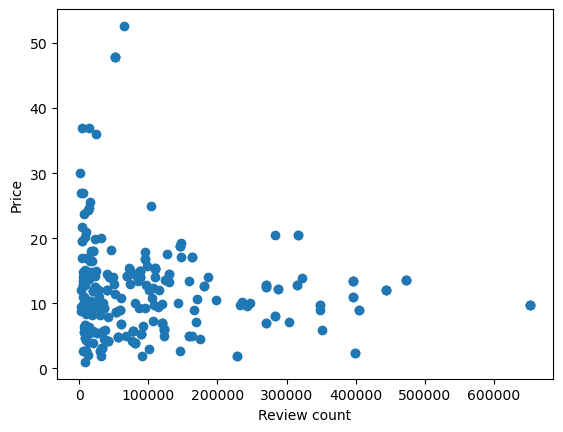

In [109]:
plt.scatter(X[:, 1], y)
plt.xlabel("Review count")
plt.ylabel("Price")

plt.show()

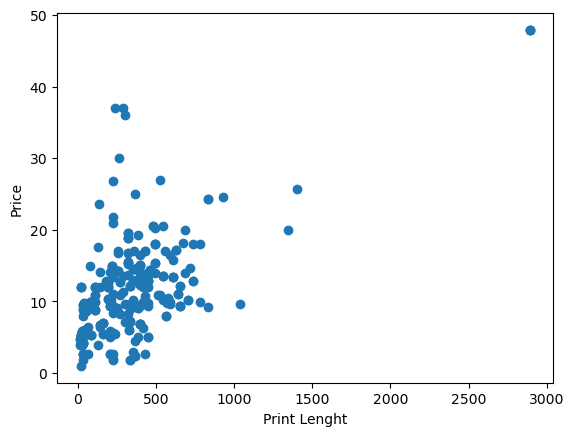

In [110]:
plt.scatter(X[:, 2], y)
plt.xlabel("Print Lenght")
plt.ylabel("Price")

plt.show()

### Removing an outliers

In [111]:
def cap_data(df):
    for col in df.columns:
        print("capping the : ", col)
        if ( ((df[col].dtype)=='float64') | ((df[col].dtype)=='int64') ):

            percentiles = df[col].quantile([0.05,0.95]).values
            print(percentiles)

            ### Adjust outliers to maximum or minimum percentile
            df.loc[df[col] <= percentiles[0], col] = percentiles[0]
            df.loc[df[col] >= percentiles[1], col] = percentiles[1]

        else:
            df[col]=df[col]

    return df

In [112]:
# X = cap_data(df_for_model.drop("price", axis=1)).values
# X

### Cross validation & Evaluate Multiple Models

In [113]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [114]:
steps = [
    ("imputation", KNNImputer(n_neighbors=5)),
    ("normalizer", MinMaxScaler())
]

models = {
    "Ridge Regession" : Ridge(alpha=0.1),
    "Lasso Regression" : Lasso(alpha=0.1),
    "Linear Regression" : LinearRegression()
}

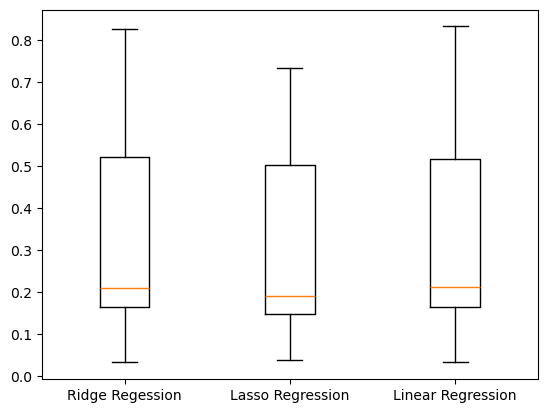

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, test_size=0.2)

### เปลี่ยนแปลงข้อมูลตาม var : steps , Transform data by using steps in pipeline
pipe = Pipeline(steps=steps)

X_train_transformed = pipe.fit_transform(X_train)
X_test_transformed = pipe.transform(X_test)

### ทดสอบ Score ของแต่ละ Model ด้วยวิธีการ Cross validation
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=11, shuffle=True)
    cv_results = cross_val_score(model, X_train_transformed, y_train, cv=kf)
    results.append(cv_results)

### Plot

plt.boxplot(results, labels=models.keys())
plt.show()

In [116]:
for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    test_score = model.score(X_test_transformed, y_test)
    print("{} Test set accuracy : {:.4f}".format(name, test_score))

Ridge Regession Test set accuracy : 0.1420
Lasso Regression Test set accuracy : 0.1088
Linear Regression Test set accuracy : 0.1417


### Test on the best regression model

In [117]:
steps_new = [
    ("imputation", KNNImputer(n_neighbors=5)),
    ("normalizer", MinMaxScaler()),
    ("Ridge", Ridge())
]

pipe_new = Pipeline(steps=steps_new)
parameters = {"Ridge__alpha": np.linspace(0.001, 1.4, 20)}

cv = GridSearchCV(pipe_new, parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

print("Ridge Regression Best score : {}\nRidge Regression Best Parameters : {}".format(cv.best_score_, cv.best_params_))

Ridge Regression Best score : 0.2708334961634954
Ridge Regression Best Parameters : {'Ridge__alpha': 0.07463157894736842}


### Test on the worst regression model

In [118]:
steps_new = [
    ("imputation", KNNImputer(n_neighbors=5)),
    ("normalizer", MinMaxScaler()),
    ("Lasso", Lasso())
]

pipe_new = Pipeline(steps=steps_new)
parameters = {"Lasso__alpha": np.linspace(0.001, 1.4, 20)}

cv = GridSearchCV(pipe_new, parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

print("Ridge Regression Best score : {}\nRidge Regression Best Parameters : {}".format(cv.best_score_, cv.best_params_))

Ridge Regression Best score : 0.27064776117307954
Ridge Regression Best Parameters : {'Lasso__alpha': 0.001}
